In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary
from skimage import io
from PIL import Image

In [2]:
import torch.optim as optim 

In [3]:
from torchvision import models

In [4]:
import cv2

# Read a batch of training images along with their bounding boxes and lables.

In [5]:


img0 = io.imread(r'C:\Users\SAGARIKA\Desktop\practice.jpg')



In [6]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cpu


(1156, 1600, 3)


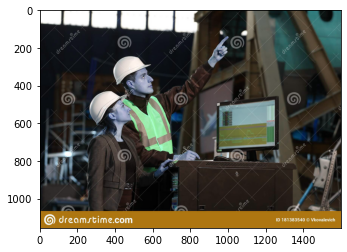

In [7]:

img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB) 
print(img0.shape)
plt.imshow(img0)
plt.show()

In [8]:
#Object information: a set of bounding boxes [ymin, xmin, ymax, xmax] and their labels  

bbox0 = np.array([[420,210,580,430], [230,400,400,590]]) 
labels = np.array([1,1]) # 0: background, 1: helmet

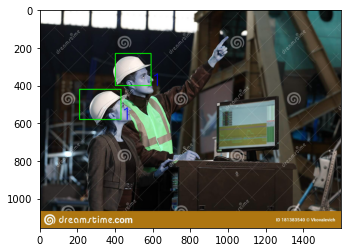

In [9]:
# display bounding box and labels

img0_clone = np.copy(img0)
for i in range(len(bbox0)):
    cv2.rectangle(img0_clone, (bbox0[i][1], bbox0[i][0]), (bbox0[i][3], bbox0[i][2]), color=(0, 255, 0), thickness=3) 
    cv2.putText(img0_clone, str(int(labels[i])), (bbox0[i][3], bbox0[i][2]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255),thickness=3) 
plt.imshow(img0_clone)
plt.show()    

# Resize the input images to (h=800, w=800)

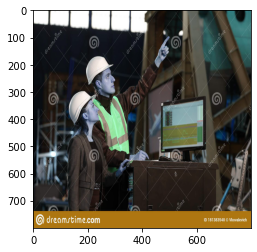

In [10]:
img = cv2.resize(img0, dsize=(800, 800), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()

In [11]:
# change the bounding box coordinates 
Wratio = 800/img0.shape[1]
Hratio = 800/img0.shape[0]
ratioLst = [Hratio, Wratio, Hratio, Wratio]
bbox = []
for box in bbox0:
    box = [int(a * b) for a, b in zip(box, ratioLst)] 
    bbox.append(box)
bbox = np.array(bbox)
print(bbox)

[[290 105 401 215]
 [159 200 276 295]]


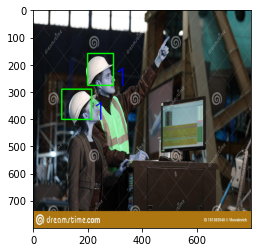

In [12]:
# display bounding box and labels
img_clone = np.copy(img)
bbox_clone = bbox.astype(int)
for i in range(len(bbox)):
    cv2.rectangle(img_clone, (bbox[i][1], bbox[i][0]), (bbox[i][3], bbox[i][2]), color=(0, 255, 0), thickness=3) # Draw Rectangle
    cv2.putText(img_clone, str(int(labels[i])), (bbox[i][3], bbox[i][2]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,0,255),thickness=3) # Write the prediction class
plt.imshow(img_clone)
plt.show()    

# Use EfficientNet to extract features from input images

# Input images (batch_size, H=800, W=800, d=3), Features: (batch_size, H= 25, W=25, d=512)

In [13]:

from efficientnet_pytorch import EfficientNet 

In [14]:

import torch
from efficientnet import EfficientNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #selecting device
print(device)

cpu


In [15]:
model = EfficientNet(b =0,
                     in_spatial_shape=32,
                     n_classes=20, 
                     pretrained=False,
                     )
model.to(device)

EfficientNet(
  (activation): Swish()
  (init_conv): ConvBNAct(
    (conv): SamePaddingConv2d(
      (zero_pad): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    )
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    (activation): Swish()
  )
  (stages): ModuleList(
    (0): EnetStage(
      (layers): ModuleList(
        (0): MBConvBlock(
          (activation): Swish()
          (dp_conv): ConvBNAct(
            (conv): SamePaddingConv2d(
              (zero_pad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), groups=32, bias=False)
            )
            (bn): BatchNorm2d(32, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (activation): Swish()
          )
          (se): SqueezeExcitate(
            (dim_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          

In [16]:
fe=nn.Sequential(*list(model.children())[:-1])

In [17]:
print(len(fe))

6


In [18]:


img0 = io.imread(r'C:\Users\SAGARIKA\Desktop\practice.jpg')



In [19]:
print(img0)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [120 115  49]
  [120 115  49]
  [120 115  49]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [120 115  49]
  [120 115  49]
  [120 115  49]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [120 115  49]
  [120 115  49]
  [120 115  49]]

 ...

 [[ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]
  ...
  [ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]]

 [[ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]
  ...
  [ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]]

 [[ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]
  ...
  [ 17 118 174]
  [ 17 118 174]
  [ 17 118 174]]]


#  input image feature extractor 

In [20]:
transform = transforms.Compose([transforms.ToTensor()]) 
imgTensor = transform(img).to(device) 

In [21]:
imgTensor.shape

torch.Size([3, 800, 800])

In [22]:
imgTensor = imgTensor.unsqueeze(0)

In [23]:
imgTensor

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.1922, 0.1922, 0.1922],
          [1.0000, 1.0000, 1.0000,  ..., 0.1922, 0.1922, 0.1922],
          [1.0000, 1.0000, 1.0000,  ..., 0.1922, 0.1922, 0.1922],
          ...,
          [0.6824, 0.6824, 0.6824,  ..., 0.6824, 0.6824, 0.6824],
          [0.6824, 0.6824, 0.6824,  ..., 0.6824, 0.6824, 0.6824],
          [0.6824, 0.6824, 0.6824,  ..., 0.6824, 0.6824, 0.6824]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.4510, 0.4510, 0.4510],
          [1.0000, 1.0000, 1.0000,  ..., 0.4510, 0.4510, 0.4510],
          [1.0000, 1.0000, 1.0000,  ..., 0.4510, 0.4510, 0.4510],
          ...,
          [0.4627, 0.4627, 0.4627,  ..., 0.4627, 0.4627, 0.4627],
          [0.4627, 0.4627, 0.4627,  ..., 0.4627, 0.4627, 0.4627],
          [0.4627, 0.4627, 0.4627,  ..., 0.4627, 0.4627, 0.4627]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.4706, 0.4706, 0.4706],
          [1.0000, 1.0000, 1.0000,  ..., 0.4706, 0.4706, 0.4706],
          [1.0000, 1.0000, 1.0000,  ..., 0

In [24]:
imgTensor.shape

torch.Size([1, 3, 800, 800])

In [25]:
features=model.get_features(imgTensor.float())[-1]

In [26]:
print(features)

tensor([[[[-0.6736, -0.3655, -0.6531,  ..., -0.5660, -0.6737, -0.8104],
          [-1.0619, -0.7757, -0.3523,  ..., -0.4489, -0.5572, -0.6401],
          [-0.6805, -0.9821, -0.5784,  ..., -0.7452, -0.5552, -0.5004],
          ...,
          [ 1.6197,  3.0614,  2.4267,  ...,  2.8206,  1.3307,  0.1475],
          [ 1.4062, -1.6414,  0.7263,  ..., -0.0526,  0.6271,  1.5790],
          [-0.6639,  1.9018, -0.8757,  ..., -0.0292, -1.6702, -0.5707]],

         [[-0.0862, -0.0658,  0.3240,  ...,  0.6769,  0.3962,  0.3507],
          [ 0.1977,  0.6430,  0.7678,  ...,  0.2745,  0.5462,  0.1659],
          [ 0.2739,  0.1313,  0.2784,  ...,  0.3102,  0.2090,  0.3109],
          ...,
          [ 0.1536,  0.0648, -2.6960,  ...,  0.1868, -2.1643, -1.1416],
          [ 0.4676,  3.8054,  0.0108,  ...,  0.2272, -0.4586, -1.0058],
          [-0.1320,  0.7371,  0.0222,  ..., -1.2350, -0.2631, -0.4672]],

         [[-0.0300, -0.8894, -0.3336,  ..., -0.0474, -0.2349,  0.1101],
          [-0.2499,  0.1701, -

In [27]:
print(features.shape) 
print(len(features))

torch.Size([1, 320, 25, 25])
1


In [28]:
faster_rcnn_fe_extractor = nn.Sequential(*fe)

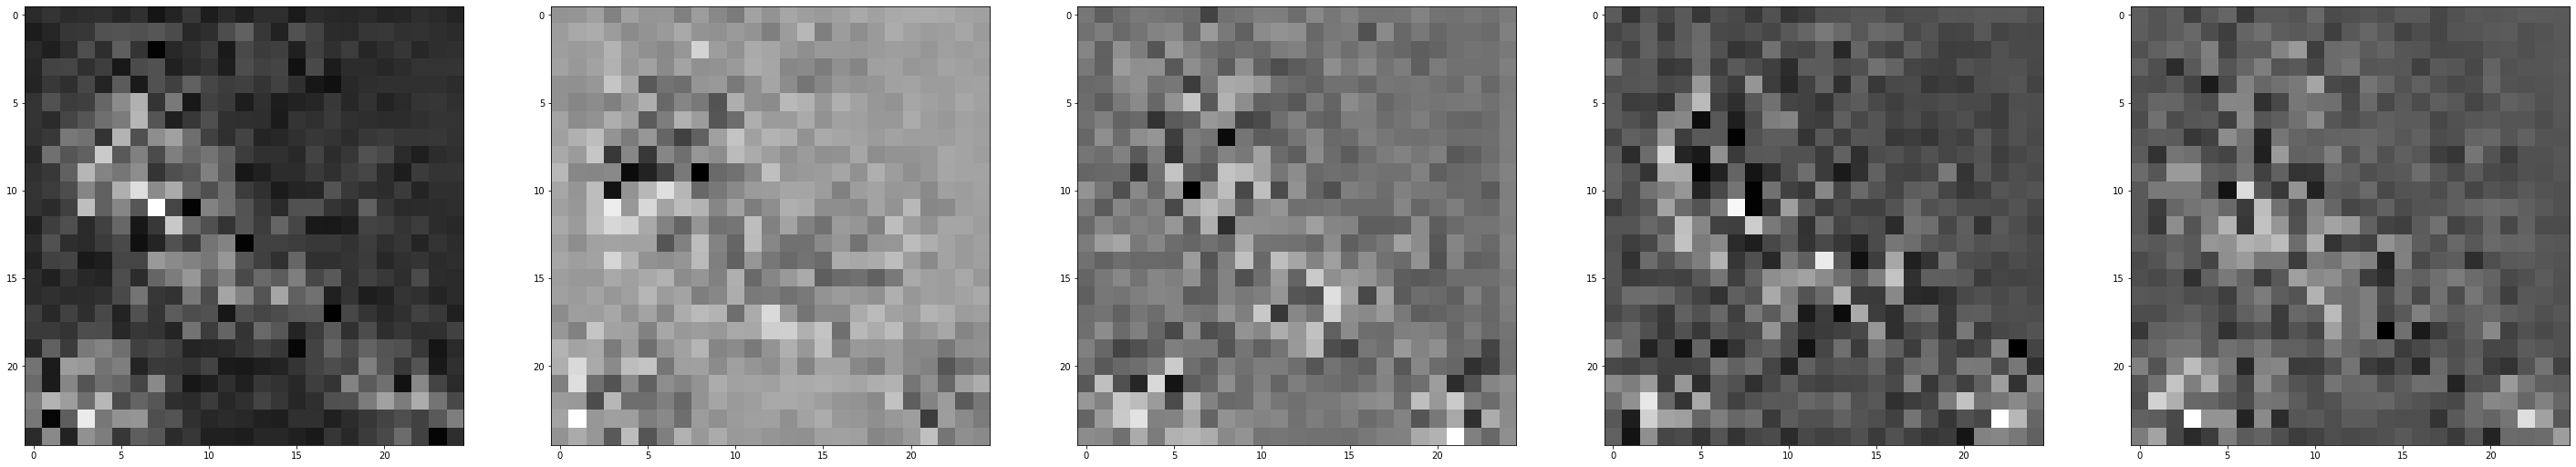

In [29]:
# visualize the first 5 channels of the 50*50*512 feature maps
imgArray=features.data.cpu().numpy().squeeze(0)
fig=plt.figure(figsize=(50, 15))
figNo = 1
for i in range(5): 
    fig.add_subplot(1, 5, figNo) 
    plt.imshow(imgArray[i], cmap='gray')
    figNo +=1
plt.savefig("output.jpg")
plt.show()

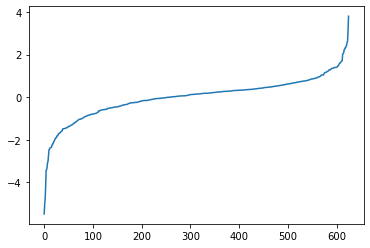

In [30]:
plt.plot(sorted(imgArray[1].flatten()))

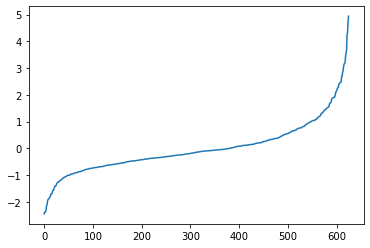

In [31]:
plt.plot(sorted(imgArray[3].flatten()))

Generate 5625 anchor boxes on each input image
25x25=625 anchors, each anchor generate 9 anchor boxes, Total = 25x25x9=5625

In [33]:
# x, y intervals to generate anchor box center
fe_size = (800//32)
ctr_x = np.arange(32, (fe_size+1) * 32, 32)
ctr_y = np.arange(32, (fe_size+1) * 32, 32)
print(len(ctr_x), ctr_x)

25 [ 32  64  96 128 160 192 224 256 288 320 352 384 416 448 480 512 544 576
 608 640 672 704 736 768 800]


In [34]:
# coordinates of the 625 center points to generate anchor boxes
index = 0
ctr = np.zeros((625, 2))
for x in range(len(ctr_x)):
    for y in range(len(ctr_y)):
        ctr[index, 1] = ctr_x[x] - 8
        ctr[index, 0] = ctr_y[y] - 8
        index +=1
print(ctr.shape)


(625, 2)


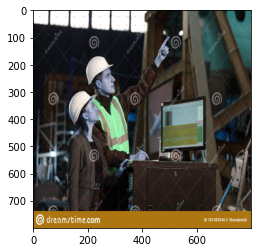

In [35]:
# display the 625 anchors
img_clone = np.copy(img)
plt.figure(figsize=(8,4))
for i in range(ctr.shape[0]):
    cv2.circle(img_clone, (int(ctr[i][0]), int(ctr[i][1])), radius=1, color=(255, 0, 0), thickness=1) 
plt.imshow(img_clone)  
plt.show() 

In [36]:
# for each of the 625 anchors, generate 9 anchor boxes
# 625*9 = 5625 anchor boxes
ratios = [0.5, 1, 2]
scales = [4,8,16]
sub_sample = 32
anchor_boxes = np.zeros( ((fe_size * fe_size * 9), 4))
index = 0
for c in ctr:
    ctr_y, ctr_x = c 
    for i in range(len(ratios)):
        for j in range(len(scales)):
            h = sub_sample * scales[j] * np.sqrt(ratios[i])
            w = sub_sample * scales[j] * np.sqrt(1./ ratios[i])
            anchor_boxes[index, 0] = ctr_y - h / 2.
            anchor_boxes[index, 1] = ctr_x - w / 2.
            anchor_boxes[index, 2] = ctr_y + h / 2.
            anchor_boxes[index, 3] = ctr_x + w / 2.
            index += 1
print(anchor_boxes.shape)

(5625, 4)


In [37]:
anchor_boxes

array([[ -21.254834  ,  -66.50966799,   69.254834  ,  114.50966799],
       [ -66.50966799, -157.01933598,  114.50966799,  205.01933598],
       [-157.01933598, -338.03867197,  205.01933598,  386.03867197],
       ...,
       [ 701.49033201,  746.745166  ,  882.50966799,  837.254834  ],
       [ 610.98066402,  701.49033201,  973.01933598,  882.50966799],
       [ 429.96132803,  610.98066402, 1154.03867197,  973.01933598]])

In [38]:
ctr_y = sub_sample / 2.
ctr_x = sub_sample / 2.

In [39]:
model = model.to(device)

Since we got 9 anchors at each location and there 25 * 25 such locations inside an image, We will get 5625 (25 * 25 * 9) anchors in total. 

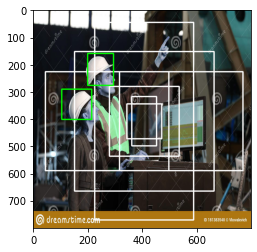

In [40]:
# display the 9 anchor boxes of one anchor and the ground trugh bbox

img_clone = np.copy(img)
for i in range(2810,2817):  
    x0 = int(anchor_boxes[i][1])
    y0 = int(anchor_boxes[i][0])
    x1 = int(anchor_boxes[i][3])
    y1 = int(anchor_boxes[i][2])
    cv2.rectangle(img_clone, (x0, y0), (x1, y1), color=(255, 255, 2550), thickness=3) 

for i in range(len(bbox)):
    cv2.rectangle(img_clone, (bbox[i][1], bbox[i][0]), (bbox[i][3], bbox[i][2]), color=(0, 255, 0), thickness=3) # Draw Rectangle
    
plt.imshow(img_clone)
plt.show()  

# valid anchor box and ground truth boxes

In [41]:
# Ignore cross-boundary anchor boxes
# valid anchor boxes with (y1, x1)>0 and (y2, x2)<=800
index_inside = np.where(
        (anchor_boxes[:, 0] >= 0) &
        (anchor_boxes[:, 1] >= 0) &
        (anchor_boxes[:, 2] <= 800) &
        (anchor_boxes[:, 3] <= 800)
    )[0]
print(index_inside.shape)

valid_anchor_boxes = anchor_boxes[index_inside]
print(valid_anchor_boxes.shape)

(2235,)
(2235, 4)


- Find the max of x1 and y1 in both the boxes (xn1, yn1)
- Find the min of x2 and y2 in both the boxes (xn2, yn2)
- Now both the boxes are intersecting only
 if (xn1 < xn2) and (yn2 < yn1)
      - iou_area will be (xn2 - xn1) * (yn2 - yn1)
 else
      - iuo_area will be 0
- similarly calculate area for anchor box and ground truth object
- iou = iou_area/(anchor_box_area + ground_truth_area - iou_area)

In [42]:
# Calculate iou of the valid anchor boxes 

ious = np.empty((len(valid_anchor_boxes), 2), dtype=np.float32)
ious.fill(0)
for num1, i in enumerate(valid_anchor_boxes):
    ya1, xa1, ya2, xa2 = i  
    anchor_area = (ya2 - ya1) * (xa2 - xa1)
    for num2, j in enumerate(bbox):
        yb1, xb1, yb2, xb2 = j
        box_area = (yb2- yb1) * (xb2 - xb1)
        inter_x1 = max([xb1, xa1])
        inter_y1 = max([yb1, ya1])
        inter_x2 = min([xb2, xa2])
        inter_y2 = min([yb2, ya2])
        if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
            iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
            iou = iter_area / (anchor_area+ box_area - iter_area)            
        else:
            iou = 0.
        ious[num1, num2] = iou
print(ious.shape)

(2235, 2)


We have to find:
the highest iou for each gt_box and its corresponding anchor box
the highest iou for each anchor box and its corresponding ground truth box

In [43]:
# What anchor box has max iou with the ground truth bbox 
gt_argmax_ious = ious.argmax(axis=0)
print(gt_argmax_ious)

gt_max_ious = ious[gt_argmax_ious, np.arange(ious.shape[1])]
print(gt_max_ious)

gt_argmax_ious = np.where(ious == gt_max_ious)[0]
print(gt_argmax_ious)

[171 476]
[0.74523926 0.67840576]
[171 476]


In [44]:
# What ground truth bbox is associated with each anchor box 

argmax_ious = ious.argmax(axis=1)
print(argmax_ious.shape)
print(argmax_ious)
max_ious = ious[np.arange(len(index_inside)), argmax_ious]
print(max_ious)

(2235,)
[0 0 0 ... 0 0 0]
[0. 0. 0. ... 0. 0. 0.]


Find the anchor_boxes which have this max_ious (gt_max_ious)

In [45]:
gt_argmax_ious = np.where(ious == gt_max_ious)[0]
print(gt_argmax_ious)

[171 476]


argmax_ious — Tells which ground truth object has max iou with each anchor.

max_ious — Tells the max_iou with ground truth object with each anchor.

gt_argmax_ious — Tells the anchors with the highest Intersection-over-Union (IoU) overlap with a ground-truth box.

we assign labels ,locations to anchor box

In [46]:
label = np.empty((len(index_inside), ), dtype=np.int32)
label.fill(-1) 
print(label.shape)

(2235,)


In [47]:
# Use iou to assign 1 (objects) to two kind of anchors 
# a) The anchors with the highest iou overlap with a ground-truth-box
# b) An anchor that has an IoU overlap higher than 0.7 with ground-truth box

# Assign 0 (background) to an anchor if its IoU ratio is lower than 0.3 for all ground-truth boxes
pos_iou_threshold  = 0.7
neg_iou_threshold = 0.3
label[gt_argmax_ious] = 1
label[max_ious >= pos_iou_threshold] = 1
label[max_ious < neg_iou_threshold] = 0

# mini-batch training

pos_ratio = 0.5
n_sample = 
n_pos = pos_ratio * n_sample


In [48]:

n_sample = 256
pos_ratio = 0.5
n_pos = pos_ratio * n_sample

pos_index = np.where(label == 1)[0]
if len(pos_index) > n_pos:
    disable_index = np.random.choice(pos_index, size=(len(pos_index) - n_pos), replace=False)
    label[disable_index] = -1
    
n_neg = n_sample * np.sum(label == 1)
neg_index = np.where(label == 0)[0]\
if len(neg_index) > n_neg:
    disable_index = np.random.choice(neg_index, size=(len(neg_index) - n_neg), replace = False)
    label[disable_index] = -1

In [49]:
# For each valid anchor box, find the groundtruth object which has max_iou 

max_iou_bbox = bbox[argmax_ious]
print(max_iou_bbox.shape)

# valid anchor boxes  h, w, cx, cy 
height = valid_anchor_boxes[:, 2] - valid_anchor_boxes[:, 0]
width = valid_anchor_boxes[:, 3] - valid_anchor_boxes[:, 1]
ctr_y = valid_anchor_boxes[:, 0] + 0.5 * height
ctr_x = valid_anchor_boxes[:, 1] + 0.5 * width

# valid anchor box max iou bbox h, w, cx, cy 
base_height = max_iou_bbox[:, 2] - max_iou_bbox[:, 0]
base_width = max_iou_bbox[:, 3] - max_iou_bbox[:, 1]
base_ctr_y = max_iou_bbox[:, 0] + 0.5 * base_height
base_ctr_x = max_iou_bbox[:, 1] + 0.5 * base_width

# valid anchor boxes    loc = (y-ya/ha), (x-xa/wa), log(h/ha), log(w/wa)
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)
dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)
anchor_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(anchor_locs.shape)

(2235, 4)
(2235, 4)


For each anchor box, find the groundtruth object which has max_iou

In [50]:

max_iou_bbox = bbox[argmax_ious]
print(max_iou_bbox)

[[290 105 401 215]
 [290 105 401 215]
 [290 105 401 215]
 ...
 [290 105 401 215]
 [290 105 401 215]
 [290 105 401 215]]


we got anchor_locs and label associated with each and every valid anchor boxes

In [51]:
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)
dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)
anchor_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(anchor_locs)

[[ 1.24572327  1.14904852 -0.48907365  0.19502369]
 [ 1.06894658  1.14904852 -0.48907365  0.19502369]
 [ 0.89216988  1.14904852 -0.48907365  0.19502369]
 ...
 [-2.73828125 -4.4375     -0.14250006 -0.1515499 ]
 [-1.93625724 -6.27557268 -0.48907365  0.19502369]
 [-2.98828125 -4.4375     -0.14250006 -0.1515499 ]]


In [52]:
anchor_labels = np.empty((len(anchor_boxes),), dtype=label.dtype)
anchor_labels.fill(-1)
anchor_labels[index_inside] = label
print(anchor_labels.shape)

anchor_locations = np.empty((len(anchor_boxes),) + anchor_boxes.shape[1:], dtype=anchor_locs.dtype)
anchor_locations.fill(0)
anchor_locations[index_inside, :] = anchor_locs
print(anchor_locations.shape)

(5625,)
(5625, 4)


# RPN -5625 ROI's

In [53]:
in_channels = 320 # depends on the output feature map
mid_channels = 320
n_anchor = 9  # Number of anchors at each location

conv1 = nn.Conv2d(in_channels, mid_channels, 3, 1, 1).to(device)
conv1.weight.data.normal_(0, 0.01)
conv1.bias.data.zero_()

reg_layer = nn.Conv2d(mid_channels, n_anchor *4, 1, 1, 0).to(device)
reg_layer.weight.data.normal_(0, 0.01)
reg_layer.bias.data.zero_()

cls_layer = nn.Conv2d(mid_channels, n_anchor *2, 1, 1, 0).to(device) ## I will be going to use softmax here. you can equally use sigmoid if u replace 2 with 1.
cls_layer.weight.data.normal_(0, 0.01)
cls_layer.bias.data.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
x = conv1(features.to(device)) 
pred_anchor_locs = reg_layer(x)
pred_cls_scores = cls_layer(x)
print(pred_anchor_locs.shape, pred_cls_scores.shape)

torch.Size([1, 36, 25, 25]) torch.Size([1, 18, 25, 25])


In [55]:
pred_anchor_locs = pred_anchor_locs.permute(0, 2, 3, 1).contiguous().view(1, -1, 4)
print(pred_anchor_locs.shape)

pred_cls_scores = pred_cls_scores.permute(0, 2, 3, 1).contiguous()
print(pred_cls_scores.shape)



torch.Size([1, 5625, 4])
torch.Size([1, 25, 25, 18])


In [56]:


pred_cls_scores  = pred_cls_scores.view(1, -1, 2)
print(pred_cls_scores.shape)

torch.Size([1, 5625, 2])


In [57]:
objectness_score = pred_cls_scores.view(1, 25, 25, 9, 2)[:, :, :, :, 1].contiguous().view(1, -1)
print(objectness_score.shape)

torch.Size([1, 5625])


# RPN loss

In [58]:
print(pred_anchor_locs.shape)
print(pred_cls_scores.shape)
print(anchor_locations.shape)
print(anchor_labels.shape)

torch.Size([1, 5625, 4])
torch.Size([1, 5625, 2])
(5625, 4)
(5625,)


In [59]:
rpn_loc = pred_anchor_locs[0]
rpn_score = pred_cls_scores[0]

gt_rpn_loc = torch.from_numpy(anchor_locations)
gt_rpn_score = torch.from_numpy(anchor_labels)

print(rpn_loc.shape, rpn_score.shape, gt_rpn_loc.shape, gt_rpn_score.shape)

torch.Size([5625, 4]) torch.Size([5625, 2]) torch.Size([5625, 4]) torch.Size([5625])


In [60]:
rpn_cls_loss = F.cross_entropy(rpn_score, gt_rpn_score.long().to(device), ignore_index = -1)
print(rpn_cls_loss)

tensor(0.6972, grad_fn=<NllLossBackward>)


In [61]:
# For Regression we use smooth L1 loss as defined in the Fast RCNN paper
pos = gt_rpn_score > 0
mask = pos.unsqueeze(1).expand_as(rpn_loc)
print(mask.shape)

# take those bounding boxes which have positve labels
mask_loc_preds = rpn_loc[mask].view(-1, 4)
mask_loc_targets = gt_rpn_loc[mask].view(-1, 4)
print(mask_loc_preds.shape, mask_loc_targets.shape)

x = torch.abs(mask_loc_targets.cpu() - mask_loc_preds.cpu())
rpn_loc_loss = ((x < 1).float() * 0.5 * x**2) + ((x >= 1).float() * (x-0.5))
print(rpn_loc_loss.sum())

torch.Size([5625, 4])
torch.Size([2, 4]) torch.Size([2, 4])
tensor(0.1326, dtype=torch.float64, grad_fn=<SumBackward0>)


In [62]:
rpn_lambda = 10.
N_reg = (gt_rpn_score >0).float().sum()
rpn_loc_loss = rpn_loc_loss.sum() / N_reg
rpn_loss = rpn_cls_loss + (rpn_lambda * rpn_loc_loss)
print(rpn_loss)

tensor(1.3603, dtype=torch.float64, grad_fn=<AddBackward0>)


# NMS (Non-maximum supression)

In [63]:
nms_thresh = 0.7  # non-maximum supression (NMS) 
n_train_pre_nms = 12000 # no. of train pre-NMS
n_train_post_nms = 2000 # after nms, training Fast R-CNN using 2000 RPN proposals
n_test_pre_nms = 6000
n_test_post_nms = 300 # During testing we evaluate 300 proposals,
min_size = 16


In [64]:
# format converted from [y1, x1, y2, x2] to [ctr_x, ctr_y, h, w]
anc_height = anchor_boxes[:, 2] - anchor_boxes[:, 0]
anc_width = anchor_boxes[:, 3] - anchor_boxes[:, 1]
anc_ctr_y = anchor_boxes[:, 0] + 0.5 * anc_height
anc_ctr_x = anchor_boxes[:, 1] + 0.5 * anc_width
print(anc_ctr_x.shape)

# The 5625 anchor boxes location and labels predicted by RPN (convert to numpy)
# format = (dy, dx, dh, dw)
pred_anchor_locs_numpy = pred_anchor_locs[0].cpu().data.numpy()
objectness_score_numpy = objectness_score[0].cpu().data.numpy()
dy = pred_anchor_locs_numpy[:, 0::4] #每個 anchor box 的 dy
dx = pred_anchor_locs_numpy[:, 1::4] # dx
dh = pred_anchor_locs_numpy[:, 2::4] # dh
dw = pred_anchor_locs_numpy[:, 3::4] # dw
print(dy.shape)

# ctr_y = dy predicted by RPN * anchor_h + anchor_cy
# ctr_x similar
# h = exp(dh predicted by RPN) * anchor_h
# w similar
ctr_y = dy * anc_height[:, np.newaxis] + anc_ctr_y[:, np.newaxis]
ctr_x = dx * anc_width[:, np.newaxis] + anc_ctr_x[:, np.newaxis]
h = np.exp(dh) * anc_height[:, np.newaxis]
w = np.exp(dw) * anc_width[:, np.newaxis]
print(w.shape)


(5625,)
(5625, 1)
(5625, 1)


In [65]:
roi = np.zeros(pred_anchor_locs_numpy.shape, dtype=anchor_locs.dtype)
roi[:, 0::4] = ctr_y - 0.5 * h
roi[:, 1::4] = ctr_x - 0.5 * w
roi[:, 2::4] = ctr_y + 0.5 * h
roi[:, 3::4] = ctr_x + 0.5 * w
print(roi.shape)

# clip the predicted boxes to the image
img_size = (800, 800) #Image size
roi[:, slice(0, 4, 2)] = np.clip(roi[:, slice(0, 4, 2)], 0, img_size[0])
roi[:, slice(1, 4, 2)] = np.clip(roi[:, slice(1, 4, 2)], 0, img_size[1])
print(roi.shape, np.max(roi), np.min(roi))

(5625, 4)
(5625, 4) 800.0 0.0


In [66]:
# Remove predicted boxes with either height or width < threshold.
hs = roi[:, 2] - roi[:, 0]
ws = roi[:, 3] - roi[:, 1]
keep = np.where((hs >= min_size) & (ws >= min_size))[0] #min_size=16
roi = roi[keep, :]
score = objectness_score_numpy[keep]
print(keep.shape, roi.shape, score.shape)

# Sort all (proposal, score) pairs by score from highest to lowest
order = score.ravel().argsort()[::-1]
print(order.shape)

#Take top pre_nms_topN 
order = order[:n_train_pre_nms]
roi = roi[order, :]
print(order.shape, roi.shape, roi.shape)

(5625,) (5625, 4) (5625,)
(5625,)
(5625,) (5625, 4) (5625, 4)


In [67]:
y1 = roi[:, 0]
x1 = roi[:, 1]
y2 = roi[:, 2]
x2 = roi[:, 3]

# Find the areas of all the boxes [roi_area]
areas = (x2 - x1 + 1) * (y2 - y1 + 1)

In [68]:
order = order.argsort()[::-1]
keep = []
while (order.size > 0):
    i = order[0] #take the 1st elt in order and append to keep 
    keep.append(i)
    xx1 = np.maximum(x1[i], x1[order[1:]]) 
    yy1 = np.maximum(y1[i], y1[order[1:]])
    xx2 = np.minimum(x2[i], x2[order[1:]])  
    yy2 = np.minimum(y2[i], y2[order[1:]])
    w = np.maximum(0.0, xx2 - xx1 + 1)
    h = np.maximum(0.0, yy2 - yy1 + 1)
    inter = w * h
    ovr = inter / (areas[i] + areas[order[1:]] - inter)
    inds = np.where(ovr <= nms_thresh)[0]
    order = order[inds + 1]
keep = keep[:n_train_post_nms] # while training/testing , use accordingly
roi = roi[keep] # the final region proposals
print(len(keep), roi.shape)

2000 (2000, 4)


In [69]:
n_sample = 128  # Number of samples from roi 
pos_ratio = 0.25 # Number of positive examples out of the n_samples
pos_iou_thresh = 0.5  # Min iou of region proposal with any groundtruth object to consider it as positive label
neg_iou_thresh_hi = 0.5  # iou 0~0.5 is considered as negative (0, background)
neg_iou_thresh_lo = 0.0

In [70]:
ious = np.empty((len(roi), 2), dtype=np.float32)
ious.fill(0)
for num1, i in enumerate(roi):
    ya1, xa1, ya2, xa2 = i  
    anchor_area = (ya2 - ya1) * (xa2 - xa1)
    for num2, j in enumerate(bbox):
        yb1, xb1, yb2, xb2 = j
        box_area = (yb2- yb1) * (xb2 - xb1)
        inter_x1 = max([xb1, xa1])
        inter_y1 = max([yb1, ya1])
        inter_x2 = min([xb2, xa2])
        inter_y2 = min([yb2, ya2])
        if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
            iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
            iou = iter_area / (anchor_area+ box_area - iter_area)            
        else:
            iou = 0.
        ious[num1, num2] = iou
print(ious.shape)

(2000, 2)


In [71]:
gt_assignment = ious.argmax(axis=1)
max_iou = ious.max(axis=1)
print(gt_assignment)
print(max_iou)

# Assign the labels to each proposal
gt_roi_label = labels[gt_assignment]
print(gt_roi_label)

[0 0 0 ... 1 0 0]
[0.         0.         0.         ... 0.08251095 0.         0.        ]
[1 1 1 ... 1 1 1]


In [72]:
pos_roi_per_image = 32 
pos_index = np.where(max_iou >= pos_iou_thresh)[0]
pos_roi_per_this_image = int(min(pos_roi_per_image, pos_index.size))
if pos_index.size > 0:
    pos_index = np.random.choice(
        pos_index, size=pos_roi_per_this_image, replace=False)
print(pos_roi_per_this_image)
print(pos_index)

# Similarly we do for negitive (background) region proposals
neg_index = np.where((max_iou < neg_iou_thresh_hi) &
                             (max_iou >= neg_iou_thresh_lo))[0]
neg_roi_per_this_image = n_sample - pos_roi_per_this_image
neg_roi_per_this_image = int(min(neg_roi_per_this_image, neg_index.size))
if  neg_index.size > 0 :
    neg_index = np.random.choice(
        neg_index, size=neg_roi_per_this_image, replace=False)
print(neg_roi_per_this_image)
print(neg_index)


9
[1740 1814 1820 1737 1815 1819 1822 1664 1738]
119
[1247 1184 1548 1779  778  732  476 1264 1725 1782 1696 1902 1213  694
 1642   51 1466  164 1160  179  793 1998  727 1507  774  539  980 1040
  167 1288 1324  289 1698 1535  423  889 1372 1127  949   30 1955 1695
 1726 1745   12    1 1750   50 1099  575 1163 1216 1551  532  113 1295
 1323 1659  150 1884 1176  851 1354  876 1301 1658  244  553 1931 1613
  128 1519 1189   71  997 1803 1660  201  833 1253 1360 1388 1149  919
 1603  272  417 1835 1631 1470  624 1156  995  241  749  119 1377  682
  825 1277  693  612   95 1450  746 1006 1566 1313 1840 1379  131 1181
  459  479 1098  467 1786  822 1719]


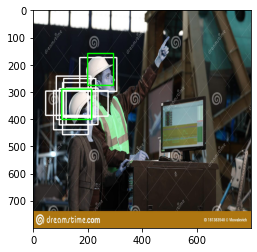

In [73]:
img_clone = np.copy(img)
for i in range(pos_roi_per_this_image):
    y0, x0, y1, x1 = roi[pos_index[i]].astype(int)
    cv2.rectangle(img_clone, (x0, y0), (x1, y1), color=(255, 255, 2550), thickness=3) 

for i in range(len(bbox)):
    cv2.rectangle(img_clone, (bbox[i][1], bbox[i][0]), (bbox[i][3], bbox[i][2]), color=(0, 255, 0), thickness=3) # Draw Rectangle
    
plt.imshow(img_clone)
plt.show()  

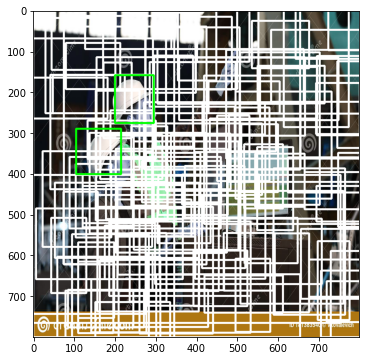

In [74]:
img_clone = np.copy(img)
plt.figure(figsize=(9, 6))
for i in range(neg_roi_per_this_image):
    y0, x0, y1, x1 = roi[neg_index[i]].astype(int)
    cv2.rectangle(img_clone, (x0, y0), (x1, y1), color=(255, 255, 2550), thickness=3) 

for i in range(len(bbox)):
    cv2.rectangle(img_clone, (bbox[i][1], bbox[i][0]), (bbox[i][3], bbox[i][2]), color=(0, 255, 0), thickness=3) # Draw Rectangle
    
plt.imshow(img_clone)
plt.show()  

In [75]:
keep_index = np.append(pos_index, neg_index)
gt_roi_labels = gt_roi_label[keep_index]
gt_roi_labels[pos_roi_per_this_image:] = 0  # negative labels --> 0
sample_roi = roi[keep_index]
print(sample_roi.shape)

# Pick the ground truth objects for these sample_roi and 
# later parameterize as we have done while assigning locations to anchor boxes
bbox_for_sampled_roi = bbox[gt_assignment[keep_index]]
print(bbox_for_sampled_roi.shape)

height = sample_roi[:, 2] - sample_roi[:, 0]
width = sample_roi[:, 3] - sample_roi[:, 1]
ctr_y = sample_roi[:, 0] + 0.5 * height
ctr_x = sample_roi[:, 1] + 0.5 * width

base_height = bbox_for_sampled_roi[:, 2] - bbox_for_sampled_roi[:, 0]
base_width = bbox_for_sampled_roi[:, 3] - bbox_for_sampled_roi[:, 1]
base_ctr_y = bbox_for_sampled_roi[:, 0] + 0.5 * base_height
base_ctr_x = bbox_for_sampled_roi[:, 1] + 0.5 * base_width

(128, 4)
(128, 4)


In [76]:
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)

dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)

gt_roi_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(gt_roi_locs.shape)

(128, 4)


# 128 ROI samples features, max pooling same size, H=7, W=7 (ROI Pooling)

In [77]:
rois = torch.from_numpy(sample_roi).float()
roi_indices = 0 * np.ones((len(rois),), dtype=np.int32)
roi_indices = torch.from_numpy(roi_indices).float()http://localhost:8888/notebooks/EFFICIENT%20NET/internship.ipynb#128-ROI-samples-features,-max-pooling-same-size,-H=7,-W=7-(ROI-Pooling)
print(rois.shape, roi_indices.shape)

indices_and_rois = torch.cat([roi_indices[:, None], rois], dim=1)
xy_indices_and_rois = indices_and_rois[:, [0, 2, 1, 4, 3]]
indices_and_rois = xy_indices_and_rois.contiguous()
print(xy_indices_and_rois.shape)

torch.Size([128, 4]) torch.Size([128])
torch.Size([128, 5])


In [78]:
size = (7, 7)
adaptive_max_pool = nn.AdaptiveMaxPool2d(size[0], size[1])

In [81]:
output = []
rois = indices_and_rois.data.float()
rois[:, 1:].mul_(1/16.0) # Subsampling ratio
rois = rois.long()
num_rois = rois.size(0)
for i in range(num_rois):
    roi = rois[i]
    im_idx = roi[0]
    im = features.narrow(0, im_idx, 1)[..., roi[2]:(roi[4]+1), roi[1]:(roi[3]+1)]
    tmp = adaptive_max_pool(im)
    output.append(tmp[0])
output = torch.cat(output, 0)
print(output.size())

torch.Size([128, 320, 7, 7])


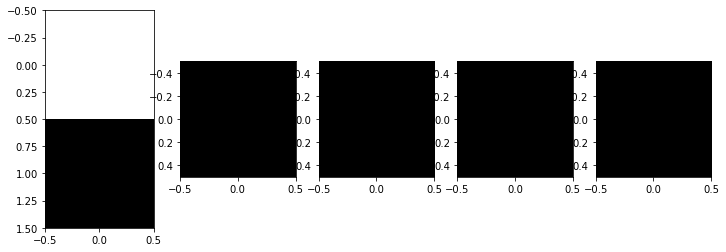

In [82]:
fig=plt.figure(figsize=(12, 4))
figNo = 1
for i in range(5):
    roi = rois[i]
    im_idx = roi[0]
    im = features.narrow(0, im_idx, 1)[..., roi[2]:(roi[4]+1), roi[1]:(roi[3]+1)]
    tmp = im[0][0].detach().cpu().numpy()
    fig.add_subplot(1, 5, figNo) 
    plt.imshow(tmp, cmap='gray')
    figNo +=1
plt.show()

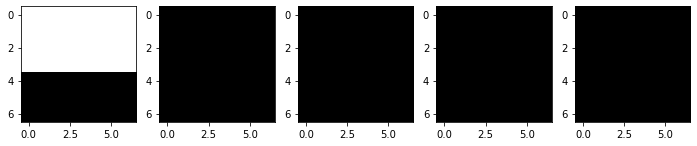

In [83]:
fig=plt.figure(figsize=(12, 4))
figNo = 1
for i in range(5):
    roi = rois[i]
    im_idx = roi[0]
    im = features.narrow(0, im_idx, 1)[..., roi[2]:(roi[4]+1), roi[1]:(roi[3]+1)]
    tmp = adaptive_max_pool(im)[0]
    tmp = tmp[0][0].detach().cpu().numpy()
    fig.add_subplot(1, 5, figNo) 
    plt.imshow(tmp, cmap='gray')
    figNo +=1
plt.show()


In [84]:
k = output.view(output.size(0), -1)
print(k.shape) # 7*7*320

torch.Size([128, 15680])


In [85]:
roi_head_classifier = nn.Sequential(*[nn.Linear(15680, 4096), nn.Linear(4096, 4096)]).to(device)
cls_loc = nn.Linear(4096, 2 * 4).to(device) 
cls_loc.weight.data.normal_(0, 0.01)
cls_loc.bias.data.zero_()

score = nn.Linear(4096, 2).to(device)

In [86]:
k = roi_head_classifier(k.to(device))
roi_cls_loc = cls_loc(k)
roi_cls_score = score(k)
print(roi_cls_loc.shape, roi_cls_score.shape)

torch.Size([128, 8]) torch.Size([128, 2])


# Fast RCNN  loss

In [87]:
print(roi_cls_loc.shape)
print(roi_cls_score.shape)

#actual
print(gt_roi_locs.shape)
print(gt_roi_labels.shape)

torch.Size([128, 8])
torch.Size([128, 2])
(128, 4)
(128,)


In [88]:
gt_roi_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
gt_roi_loc = torch.from_numpy(gt_roi_locs)
gt_roi_label = torch.from_numpy(np.float32(gt_roi_labels)).long()
print(gt_roi_loc.shape, gt_roi_label.shape)

#Classification loss
roi_cls_loss = F.cross_entropy(roi_cls_score.cpu(), gt_roi_label.cpu(), ignore_index=-1)
print(roi_cls_loss.shape)

torch.Size([128, 4]) torch.Size([128])
torch.Size([])


In [90]:
n_sample = roi_cls_loc.shape[0]
roi_loc = roi_cls_loc.view(n_sample, -1, 4)
print(roi_loc.shape)

roi_loc = roi_loc[torch.arange(0, n_sample).long(), gt_roi_label]
print(roi_loc.shape)

# For Regression we use smooth L1 loss as defined in the Fast RCNN paper
pos = gt_roi_label > 0
mask = pos.unsqueeze(1).expand_as(roi_loc)
print(mask.shape)

# take those bounding boxes which have positve labels
mask_loc_preds = roi_loc[mask].view(-1, 4)
mask_loc_targets = gt_roi_loc[mask].view(-1, 4)
print(mask_loc_preds.shape, mask_loc_targets.shape)

x = torch.abs(mask_loc_targets.cpu() - mask_loc_preds.cpu())
roi_loc_loss = ((x < 1).float() * 0.5 * x**2) + ((x >= 1).float() * (x-0.5))
print(roi_loc_loss.sum())

torch.Size([128, 2, 4])
torch.Size([128, 4])
torch.Size([128, 4])
torch.Size([9, 4]) torch.Size([9, 4])
tensor(0.7204, dtype=torch.float64, grad_fn=<SumBackward0>)


In [91]:
roi_lambda = 10.
roi_loss = roi_cls_loss + (roi_lambda * roi_loc_loss)
print(roi_loss)

tensor([[0.6285, 0.7168, 0.6817, 0.6291],
        [0.9582, 0.6201, 1.8709, 0.7463],
        [0.7056, 0.6359, 0.9378, 1.7371],
        [0.8829, 0.9272, 0.7207, 0.6362],
        [1.1430, 0.6573, 0.8519, 0.7058],
        [0.9231, 0.6287, 0.7139, 0.6549],
        [0.6221, 0.6238, 0.8691, 0.6871],
        [0.6727, 0.6703, 0.6166, 0.8211],
        [0.6166, 0.8069, 0.6648, 1.4155]], dtype=torch.float64,
       grad_fn=<AddBackward0>)


In [92]:
total_loss = rpn_loss + roi_loss
print(total_loss)

tensor([[1.9888, 2.0772, 2.0420, 1.9894],
        [2.3185, 1.9805, 3.2312, 2.1066],
        [2.0659, 1.9962, 2.2981, 3.0975],
        [2.2432, 2.2875, 2.0811, 1.9965],
        [2.5033, 2.0176, 2.2123, 2.0661],
        [2.2834, 1.9890, 2.0742, 2.0152],
        [1.9824, 1.9841, 2.2294, 2.0474],
        [2.0330, 2.0306, 1.9769, 2.1814],
        [1.9769, 2.1672, 2.0251, 2.7758]], dtype=torch.float64,
       grad_fn=<AddBackward0>)
